In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
# open four csv files: job_times_{baseline, cap, danish, decima}.csv
# parse datetimes for the 'start_time' and 'end_time' columns
job_num = 100

baseline = pd.read_csv(f'{job_num}_jobs/job_times_default_{job_num}.csv', parse_dates=['start_time', 'end_time'])
cap = pd.read_csv(f'{job_num}_jobs/job_times_cap_{job_num}.csv', parse_dates=['start_time', 'end_time'])
danish = pd.read_csv(f'{job_num}_jobs/job_times_danish_{job_num}.csv', parse_dates=['start_time', 'end_time'])
decima = pd.read_csv(f'{job_num}_jobs/job_times_decima_{job_num}.csv', parse_dates=['start_time', 'end_time'])

# drop last few rows that have no data
baseline = baseline.dropna()
cap = cap.dropna()
danish = danish.dropna()
decima = decima.dropna()

# view the head of each
print(baseline.head())
print(cap.head())
print(danish.head())
print(decima.head())

   job_id                 start_time                   end_time  \
0       0 2024-12-03 17:22:34.091679 2024-12-03 17:25:50.420277   
1       1 2024-12-03 17:22:36.101292 2024-12-03 17:26:02.522733   
2       2 2024-12-03 17:25:50.427753 2024-12-03 17:28:54.727054   
3       3 2024-12-03 17:26:02.530710 2024-12-03 17:29:34.054463   
4       7 2024-12-03 17:29:34.057659 2024-12-03 17:32:51.594491   

   carbon_footprint  
0          3056.300  
1          2454.962  
2          3818.546  
3          2657.942  
4          3085.840  
   job_id                 start_time                   end_time  \
0       0 2024-12-03 20:15:32.167523 2024-12-03 20:18:25.773633   
1       1 2024-12-03 20:15:34.173039 2024-12-03 20:18:37.883761   
2       2 2024-12-03 20:18:25.781147 2024-12-03 20:21:19.510260   
3       3 2024-12-03 20:18:37.889601 2024-12-03 20:21:44.813160   
4       6 2024-12-03 20:21:44.819530 2024-12-03 20:24:38.860225   

   carbon_footprint  
0          2904.656  
1          2203.43

In [77]:
# for each of the four dataframes, compute the total carbon footprint for the first 20 rows (sum of all the carbon footprints)
total_carbon_baseline = baseline['carbon_footprint'].sum()
total_carbon_cap = cap['carbon_footprint'].sum()
total_carbon_danish = danish['carbon_footprint'].sum()
total_carbon_decima = decima['carbon_footprint'].sum()

# print the results
print('Total Carbon Footprint for baseline:', total_carbon_baseline)
print('Total Carbon Footprint for cap:', total_carbon_cap)
print('Total Carbon Footprint for danish:', total_carbon_danish)
print('Total Carbon Footprint for decima:', total_carbon_decima)


Total Carbon Footprint for baseline: 263623.06500000006
Total Carbon Footprint for cap: 248302.92200000002
Total Carbon Footprint for danish: 246812.37300000002
Total Carbon Footprint for decima: 246411.20700000005


In [78]:
# for each of the four dataframes, compute the total time
# total time is the difference between start_time in the first row and the end_time in the last row
# all of these are datetime objects
total_time_baseline = baseline['end_time'].head(job_num).iloc[-1] - baseline['start_time'].head(job_num).iloc[0]
total_time_cap = cap['end_time'].head(job_num).iloc[-1] - cap['start_time'].head(job_num).iloc[0]
total_time_danish = danish['end_time'].head(job_num).iloc[-1] - danish['start_time'].head(job_num).iloc[0]
total_time_decima = decima['end_time'].head(job_num).iloc[-1] - decima['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline)
print('Total Time for cap:        ', total_time_cap)
print('Total Time for danish:     ', total_time_danish)
print('Total Time for decima:     ', total_time_decima)

Total Time for baseline:    0 days 02:50:56.960920
Total Time for cap:         0 days 02:38:19.157330
Total Time for danish:      0 days 02:48:00.549569
Total Time for decima:      0 days 02:40:32.032420


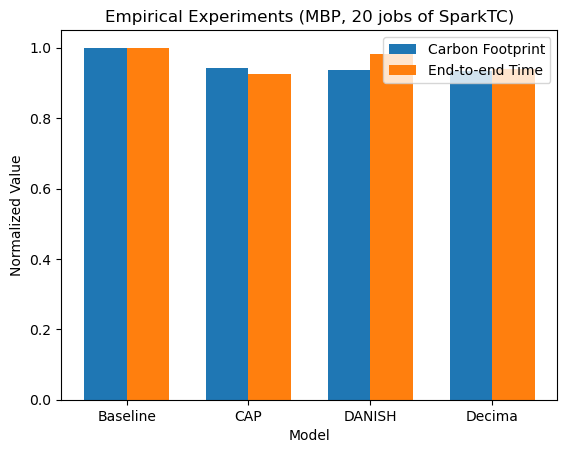

In [76]:
# plot the carbon footprint and completion time, normalized to the max of each
# bar plot in matplotlib
# make sure to label the axes and give a title
# save the plot as 'carbon_time_plot.png'

import matplotlib.pyplot as plt

carbon_data = [total_carbon_baseline, total_carbon_cap, total_carbon_danish, total_carbon_decima]
time_data = [total_time_baseline, total_time_cap, total_time_danish, total_time_decima]

carbon_data = [x / max(carbon_data) for x in carbon_data]
time_data = [x / max(time_data) for x in time_data]

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(4)

bar1 = ax.bar(index, carbon_data, bar_width, label='Carbon Footprint')
bar2 = ax.bar(index + bar_width, time_data, bar_width, label='End-to-end Time')
legend = ['Baseline', 'CAP', 'DANISH', 'Decima']
ax.set_xlabel('Model')
ax.set_ylabel('Normalized Value')
ax.set_title('Empirical Experiments (MBP, 20 jobs of SparkTC)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(legend)
ax.legend()
